# Function

In [322]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    plt.grid(False)
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [323]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : courses, 'value' : values}
    data = pd.DataFrame(data, index=courses)
    print(data)
    
    ax = data.plot(kind='bar', figsize=(3,3), color='maroon', legend=False, rot=0)
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of sample data")
    ax.grid(True, zorder=0)
    ax.set_axisbelow(True)

    plt.show()

# โหลดชุดข้อมูล

In [325]:
import helpers
X, y = helpers.get_data()

In [326]:
classes = ['lived', 'died', 'euthanized']

# Feature selection for classification

## Numerical feature 

Use LDA

In [327]:
feature_num = ['temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
X_num_feature = X[feature_num].copy()

In [328]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_num_select = lda.fit_transform(X_num_feature, y)

In [329]:
print('Original numerical feature number:', X_num_feature.shape[1])
print('Reduced numerical feature number:', X_num_select.shape[1])

Original numerical feature number: 6
Reduced numerical feature number: 2


## Nominal feature

Use Chi square

In [330]:
feature_nom = [i for i in np.array(X.columns) if i not in np.array(feature_num)]
X_nom_feature = X[feature_nom].copy()

In [331]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=15)
X_nom_select = chi2_features.fit_transform(X_nom_feature, y)

In [332]:
chi2_features.get_feature_names_out()

array(['surgery', 'age', 'temp_of_extremities', 'capillary_refill_time',
       'pain', 'peristalsis', 'abdominal_distention', 'rectal_exam_feces',
       'abdomen', 'abdomo_appearance', 'surgical_lesion', 'lesion_site',
       'lesion_type', 'lesion_subtype', 'lesion_code'], dtype=object)

In [333]:
print('Original nominal feature number:', X_nom_feature.shape[1])
print('Reduced nominal feature number:', X_nom_select.shape[1])

Original nominal feature number: 20
Reduced nominal feature number: 15


In [334]:
X_num_select.shape, X_nom_select.shape

((299, 2), (299, 15))

รวม Numerical feature และ nominal feature ที่ได้ทำการ feature selection แล้ว

In [335]:
X_select = np.concatenate([X_num_select, X_nom_select], axis=1)

In [336]:
X_select.shape

(299, 17)

# แยกข้อมูลฝึก/ทดสอบ

In [337]:
# split data
from sklearn.model_selection import train_test_split
# X_select || X
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2)

# ตัวแปรควบคุม

In [338]:
from matplotlib import pyplot as plt

In [339]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [340]:
ls_model = {
    'model_cv' : []
}

In [341]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

def bulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, scoring='accuracy')
    dtree_gscv.fit(X_train, y_train)    
    print('best params : {}'.format(dtree_gscv.best_params_))
    print('best score : {}'.format(dtree_gscv.best_score_))

    ls_model['model_cv'].append(dtree_gscv)

    return dtree_gscv.best_estimator_

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึกที่ยังไม่ได้ sampling

                 class  value
lived            lived     63
died              died     33
euthanized  euthanized    143


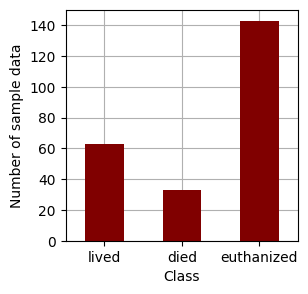

In [342]:
plotBarChart(classes, y_train)

In [343]:

model_1 = bulidAndTrainModel(X_train, y_train)

best params : {'criterion': 'entropy', 'max_depth': 3}
best score : 0.695108695652174


[Text(0.5, 0.875, 'x[15] <= 0.5\nentropy = 1.345\nsamples = 239\nvalue = [63, 33, 143]'),
 Text(0.25, 0.625, 'x[1] <= -0.908\nentropy = 1.528\nsamples = 102\nvalue = [47, 24, 31]'),
 Text(0.125, 0.375, 'x[12] <= 0.5\nentropy = 0.985\nsamples = 21\nvalue = [0, 12, 9]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 15\nvalue = [0, 6, 9]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\nentropy = 1.375\nsamples = 81\nvalue = [47, 12, 22]'),
 Text(0.3125, 0.125, 'entropy = 1.311\nsamples = 25\nvalue = [13, 10, 2]'),
 Text(0.4375, 0.125, 'entropy = 1.139\nsamples = 56\nvalue = [34, 2, 20]'),
 Text(0.75, 0.625, 'x[0] <= -0.327\nentropy = 0.857\nsamples = 137\nvalue = [16, 9, 112]'),
 Text(0.625, 0.375, 'x[1] <= 0.052\nentropy = 1.502\nsamples = 26\nvalue = [12, 5, 9]'),
 Text(0.5625, 0.125, 'entropy = 1.549\nsamples = 13\nvalue = [3, 5, 5]'),
 Text(0.6875, 0.125, 'entropy = 0.89\nsamples = 13\nvalue = [9, 0, 4]'),
 Text(0.875, 0.3

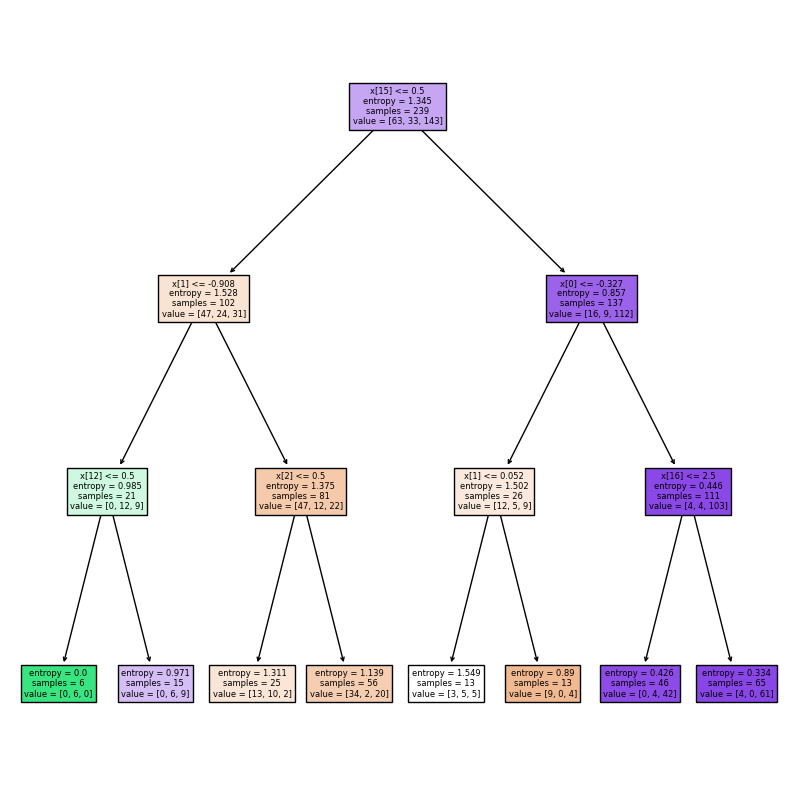

In [344]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [345]:
y_pred_1 = model_1.predict(X_test)
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.71      0.40      0.51        25
        died       0.18      0.40      0.25         5
  euthanized       0.69      0.80      0.74        30

    accuracy                           0.60        60
   macro avg       0.53      0.53      0.50        60
weighted avg       0.66      0.60      0.60        60



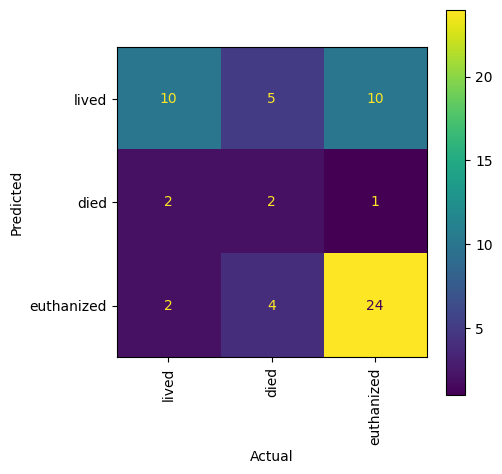

In [346]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

# การทดลองเพื่อแก้ปัญหา Imblance dataset

## Random sampling

In [347]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res_random,y_res_random = ros.fit_resample(X_train,y_train)

                 class  value
lived            lived    143
died              died    143
euthanized  euthanized    143


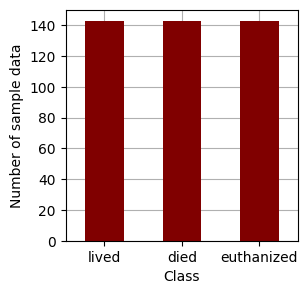

In [348]:
plotBarChart(classes, y_res_random)

In [349]:
model_randoms = bulidAndTrainModel(X_res_random, y_res_random)


best params : {'criterion': 'entropy', 'max_depth': 77}
best score : 0.9441306755260245


In [350]:
y_pred_res_rand = model_randoms.predict(X_test)
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.44      0.57      0.50        14
        died       0.36      0.36      0.36        11
  euthanized       0.77      0.69      0.73        35

    accuracy                           0.60        60
   macro avg       0.53      0.54      0.53        60
weighted avg       0.62      0.60      0.61        60



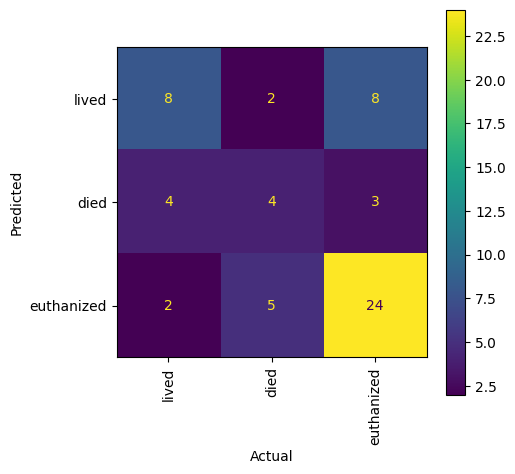

In [351]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [352]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

                 class  value
lived            lived    143
died              died    143
euthanized  euthanized    143


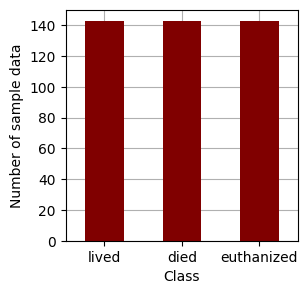

In [353]:
plotBarChart(classes, y_resampled_smote)

In [354]:
model_smote = bulidAndTrainModel(X_resampled_smote, y_resampled_smote)

best params : {'criterion': 'entropy', 'max_depth': 75}
best score : 0.8138427464008859


In [355]:
y_pred_smote = model_smote.predict(X_test)
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.50      0.58      0.54        12
        died       0.64      0.39      0.48        18
  euthanized       0.69      0.80      0.74        30

    accuracy                           0.63        60
   macro avg       0.61      0.59      0.59        60
weighted avg       0.63      0.63      0.62        60



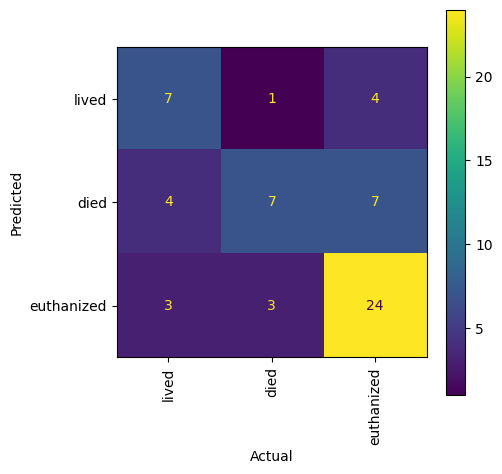

In [356]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [357]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [358]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

                 class  value
lived            lived     49
died              died     33
euthanized  euthanized    127


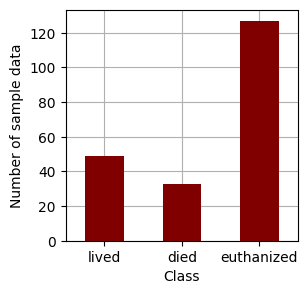

In [359]:
plotBarChart(classes, y_res_tomek)

In [360]:
model_tomek = bulidAndTrainModel(X_res_tomek, y_res_tomek)

best params : {'criterion': 'entropy', 'max_depth': 3}
best score : 0.7371428571428571


In [361]:
y_pred_tomek = model_tomek.predict(X_test)
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.40      0.71      0.51        14
        died       0.60      0.55      0.57        11
  euthanized       0.92      0.66      0.77        35

    accuracy                           0.65        60
   macro avg       0.64      0.64      0.62        60
weighted avg       0.74      0.65      0.67        60



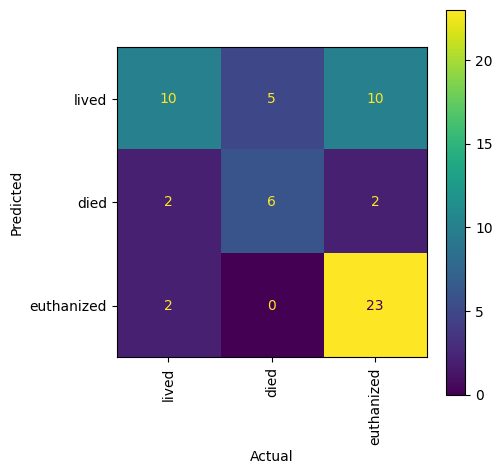

In [362]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [363]:
from imblearn.over_sampling import ADASYN

In [364]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

                 class  value
lived            lived    130
died              died    142
euthanized  euthanized    143


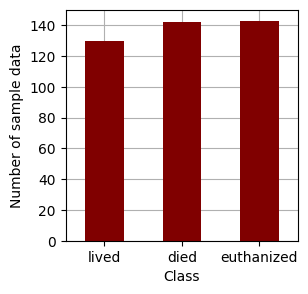

In [365]:
plotBarChart(classes, y_res_adasyn)

In [366]:
model_adasyn = bulidAndTrainModel(X_res_adasyn, y_res_adasyn)

best params : {'criterion': 'entropy', 'max_depth': 43}
best score : 0.8076074332171894


In [367]:
y_pred_adasyn = model_adasyn.predict(X_test)
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.47      0.64      0.55        14
        died       0.50      0.45      0.48        11
  euthanized       0.84      0.74      0.79        35

    accuracy                           0.67        60
   macro avg       0.60      0.61      0.60        60
weighted avg       0.69      0.67      0.67        60



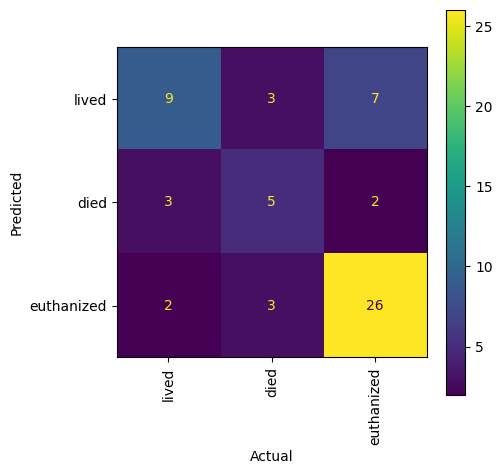

In [368]:
plotCM(y_test, y_pred_adasyn, classes)

# สรุปผลการทดลอง

In [369]:
index = ['On sampling', 'Random', 'SMOT', 'TOMEK', 'ADASYN']

ls_reslut_pred = [
    y_pred_1,
    y_pred_res_rand,
    y_pred_smote,
    y_pred_tomek,
    y_pred_adasyn ,
]

In [370]:
from sklearn import metrics

# accuarcy
accuarcy = []
for pred in ls_reslut_pred :
    accuarcy.append(metrics.accuracy_score(y_test, pred))
    
# recall
recall = []
for pred in ls_reslut_pred :
    recall.append(metrics.recall_score(y_test, pred, average='weighted'))

# F1
f1 = []
for pred in ls_reslut_pred :
    f1.append(metrics.f1_score(y_test, pred, average='weighted'))
    
# precision
precision = []
for pred in ls_reslut_pred :
    precision.append(metrics.precision_score(y_test, pred, average='weighted'))

เปรียบเทียบประสิทธิภาพโมเดลระหว่างชุดข้อมูงเรียนรู้และชุดข้อมูลทดสอบ

In [371]:
acc_train_socre = []
for g_cv in ls_model['model_cv']:
    acc_train_socre.append(g_cv.best_score_)
    
score_train_test = pd.DataFrame({
    'train accuracy' : acc_train_socre,
    'test accuracy' : accuarcy
}, index=index)

score_train_test

,train accuracy,test accuracy
On sampling,0.695109,0.600000
Random,0.944131,0.600000
SMOT,0.813843,0.633333
TOMEK,0.737143,0.650000
ADASYN,0.807607,0.666667


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the model performance between\n the learning data set and the test data set.'}>>

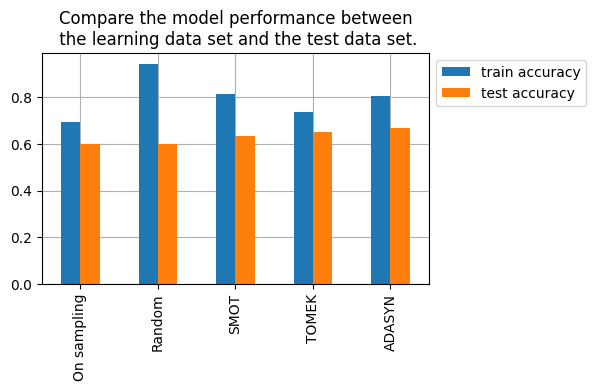

In [372]:
ax = score_train_test.plot(kind='bar', figsize=(5,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the model performance between\n the learning data set and the test data set.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot

เปรียบเทียบประสิทธิภาพของโมเดลทั้งหมด

In [373]:
data_scores = pd.DataFrame(
    data={
    'accuarcy' : accuarcy,
    'recall' : recall,
    'F1' : f1,
    'precision' : precision
    }, index=index)

data_scores

,accuarcy,recall,F1,precision
On sampling,0.600000,0.600000,0.596261,0.633333
Random,0.600000,0.600000,0.607576,0.621983
SMOT,0.633333,0.633333,0.644916,0.674074
TOMEK,0.650000,0.650000,0.671642,0.740000
ADASYN,0.666667,0.666667,0.674170,0.691440


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the performance of all models.'}>>

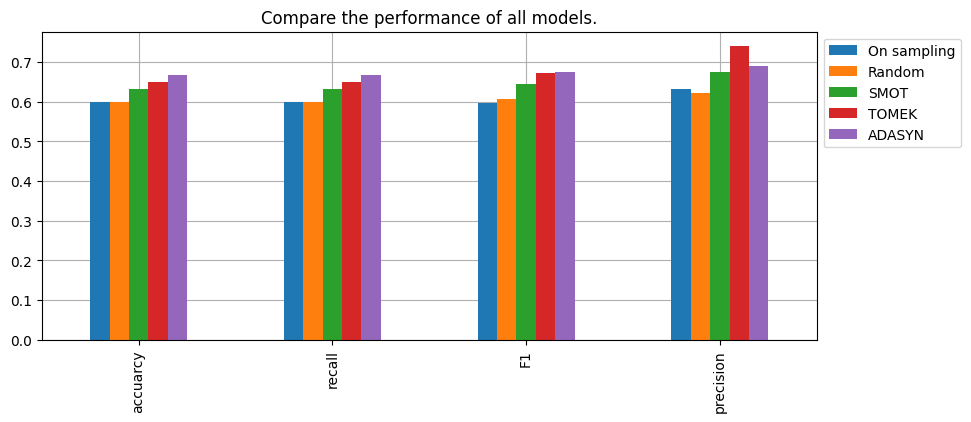

In [374]:
# performance บน test set
ax = data_scores.T.plot(kind='bar', figsize=(10,4))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the performance of all models.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot